## Part of code based on https://nbviewer.jupyter.org/github/rmotr/color-extractor-service/blob/master/demo/Extract%20colors%20from%20images.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random 
import scipy
import skimage
import skimage.io
import os
import skimage.transform
from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
#!pip install colour

You are using pip version 8.1.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
#!pip install webcolors

You are using pip version 8.1.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Show color pattern for just one image 

In [4]:
def get_one_image(folder):
    global img
    img_dir="{}/".format(folder)
    m=os.listdir("{}/".format(folder))
    for i in range(len(m)):
        if m[i]!= ".DS_Store":
            title=random.choice(m)
            img = skimage.io.imread(os.path.join(img_dir, title))
            img_vector = img.reshape((img.shape[0] * img.shape[1], 3)) 
            return img_vector, title

In [45]:
img_vector1,title=get_one_image("va_img/")

In [5]:
#find color cluster using kmeans 
CLUSTERS = 10
def kmeans1(vector):
    model = KMeans(n_clusters=CLUSTERS)
    labels = model.fit_predict(vector)
    label_counts = Counter(labels)
    rgb_colors=(model.cluster_centers_)
    return label_counts, rgb_colors, model.cluster_centers_

In [47]:
label_counts1, rgb_colors1, cluster_centers_1=kmeans1(img_vector1)

## After experimentation, it's hard to find the actual color name. So cloest color name instead

In [31]:
import webcolors
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

actual_namel=[]
closest_namel=[]
for i in range(len(rgb_colors1)):
        requested_colour = (rgb_colors1[i])
        actual_name, closest_name = get_colour_name(requested_colour)
        actual_namel.append(actual_name)
        closest_namel.append(closest_name)


NameError: name 'rgb_colors1' is not defined

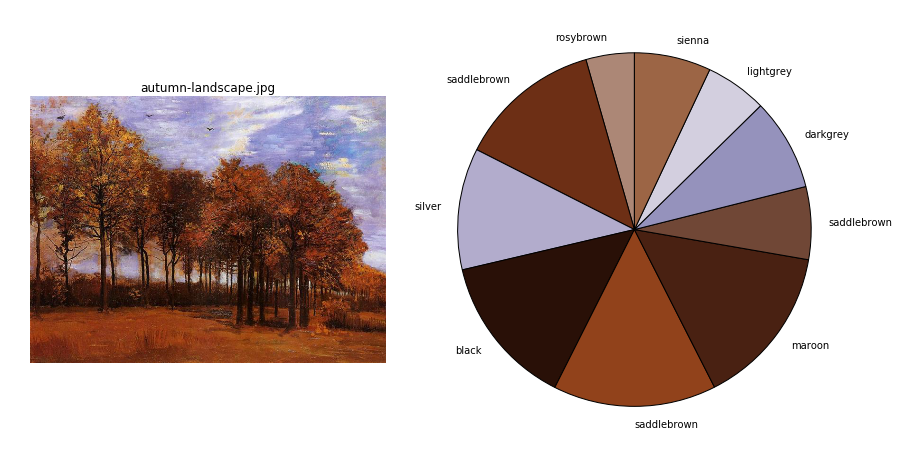

In [50]:
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(img)
plt.title(title)
plt.axis('off')

plt.subplot(122)
plt.pie(np.array(list(label_counts1.values())), labels=closest_namel, colors=[color/255 for color in cluster_centers_1], startangle=90)
plt.axis('equal')
plt.show()

## Show color pattern combing all images

In [22]:
#resize all img
img_wid = 128
img_len = 128
img_channels = 3 


def resize_img(file,img_dir):
    img = skimage.io.imread(os.path.join(img_dir, file))
    img = skimage.transform.resize(img, (img_wid, img_len), mode='reflect')

    return img[:,:,:img_channels]

In [19]:
t_m=os.listdir('va_img/')

In [21]:
hlist=[]
img_dir="va_img/"
for i in range(len(t_m)):
    if t_m[i]!= ".DS_Store":
        #img = skimage.io.imread(os.path.join(img_dir, hopper_m[i]))
        img=resize_img(t_m[i],img_dir)
        hlist.append(img)

In [54]:
im=np.vstack(hlist)

In [55]:
img_vector = im.reshape((im.shape[0] * im.shape[1], 3))

In [10]:
def kmeans2(vector):
    model = KMeans(n_clusters=CLUSTERS)
    labels = model.fit_predict(vector)
    label_counts = Counter(labels)
    rgb_colors=(model.cluster_centers_*255)
    return label_counts, rgb_colors, model.cluster_centers_

In [62]:
label_counts12, rgb_colors2, cluster_centers_2=kmeans2(img_vector)

In [63]:
#Code based on fraxel https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python

actual_namel2=[]
closest_namel2=[]
for i in range(len(rgb_colors2)):
        requested_colour = (rgb_colors2[i])
        actual_name, closest_name = get_colour_name(requested_colour)
        actual_namel2.append(actual_name)
        closest_namel2.append(closest_name)


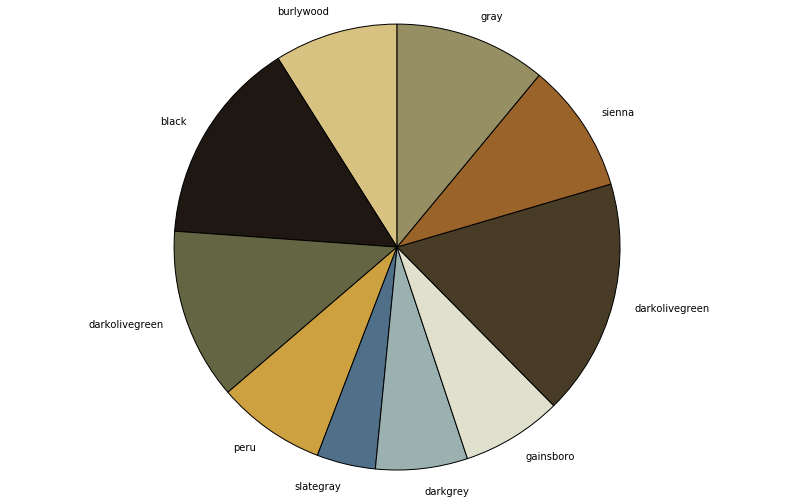

In [65]:
plt.figure(figsize=(14, 8))
plt.pie(np.array(list(label_counts12.values())), labels=closest_namel2, colors=[color for color in cluster_centers_2], startangle=90)
plt.axis('equal')
plt.show()

## Show color patterns in different periods 

In [47]:
#get sperate images 
v_m1882=os.listdir('vangoyear/v1882')
v_m1883=os.listdir('vangoyear/v1883')
v_m1884=os.listdir('vangoyear/v1884')
v_m1885=os.listdir('vangoyear/v1885')
v_m1886=os.listdir('vangoyear/v1886')
v_m1887=os.listdir('vangoyear/v1887')
v_m1888=os.listdir('vangoyear/v1888')
v_m1889=os.listdir('vangoyear/v1889')
v_after1889=os.listdir('vangoyear/after1889')

In [23]:
def get_imgvector(path,namelist):
    hlist=[]
    img_dir="{}/".format(path)
    for i in range(len(namelist)):
       
        if namelist[i]!= ".DS_Store":
            img=resize_img(namelist[i],img_dir)
            hlist.append(img)
    im=np.vstack(hlist) 
    img_vector = im.reshape((im.shape[0] * im.shape[1], 3))
    return img_vector        

In [48]:
#get vector
vector1882=get_imgvector("vangoyear/v1882",v_m1882)
vector1883=get_imgvector("vangoyear/v1883",v_m1883)
vector1884=get_imgvector("vangoyear/v1884",v_m1884)
vector1886=get_imgvector("vangoyear/v1886",v_m1886)
vector1885=get_imgvector("vangoyear/v1885",v_m1885)
vector1887=get_imgvector("vangoyear/v1887",v_m1887)
vector1888=get_imgvector("vangoyear/v1888",v_m1888)
vector1889=get_imgvector("vangoyear/v1889",v_m1889)
vectora1889=get_imgvector("vangoyear/after1889",v_after1889)

In [28]:
#get models
label_counts1882, rgb_colors1882, cluster_centers1882=kmeans2(vector1882)

In [51]:
label_counts1883, rgb_colors1883, cluster_centers1883=kmeans2(vector1883)
label_counts1884, rgb_colors1884, cluster_centers1884=kmeans2(vector1884)
label_counts1885, rgb_colors1885, cluster_centers1885=kmeans2(vector1885)
label_counts1886, rgb_colors1886, cluster_centers1886=kmeans2(vector1886)
label_counts1887, rgb_colors1887, cluster_centers1887=kmeans2(vector1887)
label_counts1888, rgb_colors1888, cluster_centers1888=kmeans2(vector1888)
label_counts1889, rgb_colors1889, cluster_centers1889=kmeans2(vector1889)
label_countsa1889, rgb_colorsa1889, cluster_centersa1889=kmeans2(vectora1889)

In [39]:
def get_name(rgb_colors2):
    actual_namel2=[]
    closest_namel2=[]
    for i in range(len(rgb_colors2)):
        requested_colour = (rgb_colors2[i])
        actual_name, closest_name = get_colour_name(requested_colour)
        actual_namel2.append(actual_name)
        closest_namel2.append(closest_name)
    return closest_namel2    

In [52]:
#get color name
color1882=get_name(rgb_colors1882)
color1883=get_name(rgb_colors1883)
color1884=get_name(rgb_colors1884)
color1885=get_name(rgb_colors1885)
color1886=get_name(rgb_colors1886)
color1887=get_name(rgb_colors1887)
color1888=get_name(rgb_colors1888)
color1889=get_name(rgb_colors1889)
colora1889=get_name(rgb_colorsa1889)

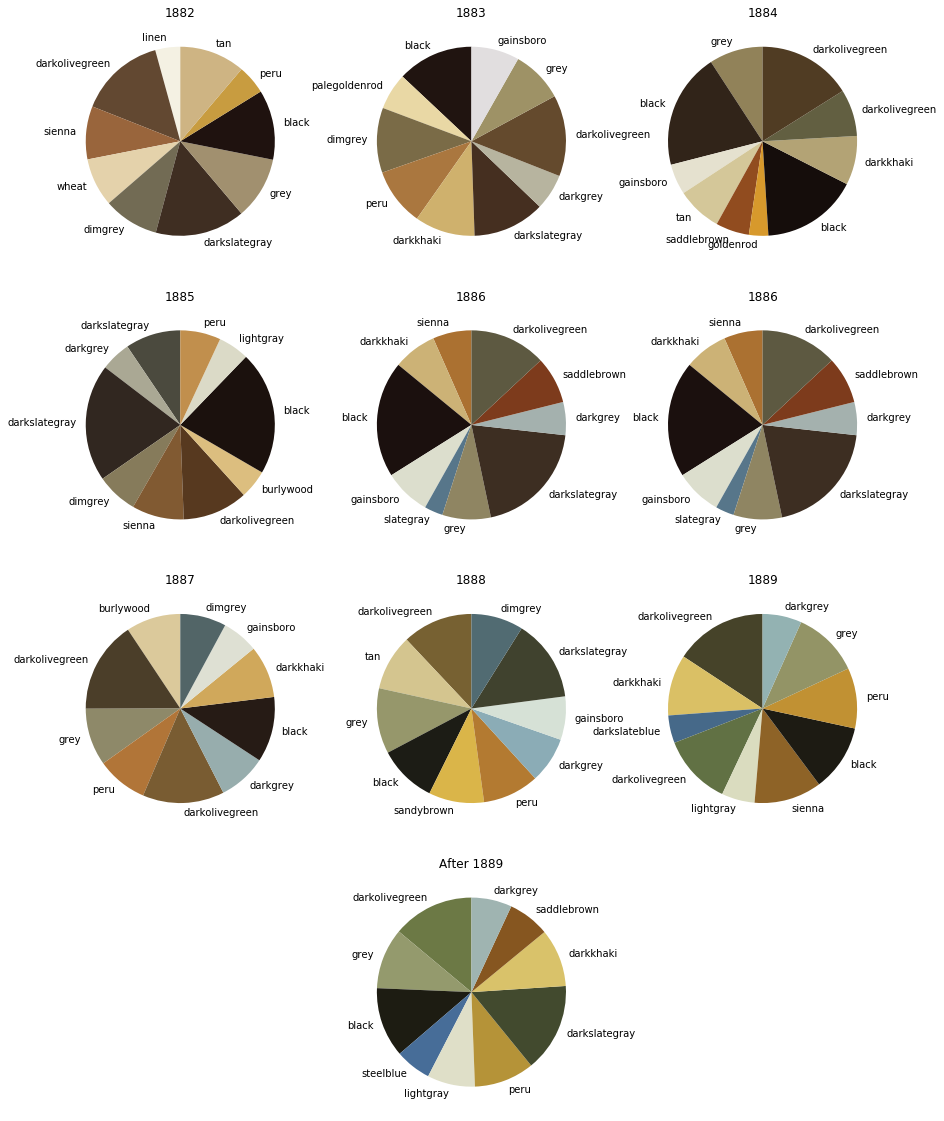

<Figure size 432x288 with 0 Axes>

In [142]:
#show all images
plt.figure(figsize=(20, 20))
from matplotlib.gridspec import GridSpec
#plt.title("Color change from 1882")
grid=GridSpec(4,4)
plt.subplot(grid[0,0],aspect=1)
plt.pie(np.array(list(label_counts1882.values())), labels=color1882, colors=[color for color in cluster_centers1882], startangle=90,)
plt.title("1882")
plt.subplot(grid[0,1],aspect=1)
plt.pie(np.array(list(label_counts1883.values())), labels=color1883, colors=[color for color in cluster_centers1883], startangle=90,)
plt.title("1883")

plt.subplot(grid[0,2],aspect=1)
plt.pie(np.array(list(label_counts1884.values())), labels=color1884, colors=[color for color in cluster_centers1884], startangle=90)
plt.title("1884")

plt.subplot(grid[1,0],aspect=1)
plt.pie(np.array(list(label_counts1885.values())), labels=color1885, colors=[color for color in cluster_centers1885], startangle=90,)
plt.title("1885")
plt.subplot(grid[1,1],aspect=1)
plt.pie(np.array(list(label_counts1886.values())), labels=color1886, colors=[color for color in cluster_centers1886], startangle=90,)
plt.title("1886")
plt.subplot(grid[1,2],aspect=1)
plt.pie(np.array(list(label_counts1886.values())), labels=color1886, colors=[color for color in cluster_centers1886], startangle=90,)
plt.title("1886")
plt.subplot(grid[2,0],aspect=1)
plt.pie(np.array(list(label_counts1887.values())), labels=color1887, colors=[color for color in cluster_centers1887], startangle=90,)
plt.title("1887")
plt.subplot(grid[2,1],aspect=1)
plt.pie(np.array(list(label_counts1888.values())), labels=color1888, colors=[color for color in cluster_centers1888], startangle=90,)
plt.title("1888")
plt.subplot(grid[2,2],aspect=1)
plt.pie(np.array(list(label_counts1889.values())), labels=color1889, colors=[color for color in cluster_centers1889], startangle=90,)
plt.title("1889")
plt.subplot(grid[3,1],aspect=1)
plt.pie(np.array(list(label_countsa1889.values())), labels=colora1889, colors=[color for color in cluster_centersa1889], startangle=90,)
plt.title("After 1889")


plt.show()
plt.tight_layout()



